In [164]:
# Ref : https://towardsdatascience.com/multiclass-classification-with-support-vector-machines-svm-kernel-trick-kernel-functions-f9d5377d6f02

import numpy as np
import torch
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from sklearn import svm

In [165]:
transform = transforms.Compose([transforms.Grayscale(), transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

In [166]:

trainset = datasets.ImageFolder('train', transform=transform)
valset = datasets.ImageFolder('val', transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=1000, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=1000, shuffle=True)

In [167]:
dataiter = iter(trainloader)
X_train, y_train = dataiter.next()


X_test, y_test = iter(valloader).next()
X_test = X_test.view(X_test.shape[0], -1)

print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

torch.Size([1000, 1, 32, 32])
torch.Size([1000])
torch.Size([178, 1024])
torch.Size([178])


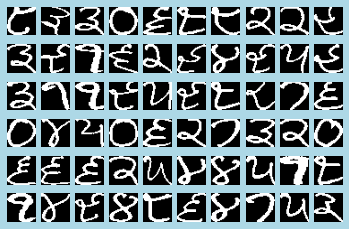

In [168]:
figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(X_train[index].numpy().squeeze(), cmap='gray_r')

In [169]:
X_train = X_train.view(X_train.shape[0], -1)

linear = svm.SVC(kernel='linear', C=1, decision_function_shape='ovo',probability=True).fit(X_train, y_train)
rbf = svm.SVC(kernel='rbf', gamma=1, C=1, decision_function_shape='ovo',probability=True).fit(X_train, y_train)
poly = svm.SVC(kernel='poly', degree=3, C=1, decision_function_shape='ovo',probability=True).fit(X_train, y_train)
sig = svm.SVC(kernel='sigmoid', C=1, decision_function_shape='ovo',probability=True).fit(X_train, y_train)

In [170]:
# retrieve the accuracy and print it for all 4 kernel functions
accuracy_lin = linear.score(X_test, y_test)
accuracy_poly = poly.score(X_test, y_test)
accuracy_rbf = rbf.score(X_test, y_test)
accuracy_sig = sig.score(X_test, y_test)
print("Accuracy Linear Kernel:", accuracy_lin)
print("Accuracy Polynomial Kernel:", accuracy_poly)
print("Accuracy Radial Basis Kernel:", accuracy_rbf)
print("Accuracy Sigmoid Kernel:", accuracy_sig)

Accuracy Linear Kernel: 0.9719101123595506
Accuracy Polynomial Kernel: 0.9662921348314607
Accuracy Radial Basis Kernel: 0.25280898876404495
Accuracy Sigmoid Kernel: 0.9550561797752809


In [171]:
def view_classify(img, ps,title):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 32, 32).numpy().squeeze())
    ax1.axis('off')
    ax1.set_title(title)
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()

In [172]:
# create the title that will be shown on the plot
titles = ['Linear kernel','RBF kernel','Polynomial kernel','Sigmoid kernel']

Model = Linear kernel
Predicted Digit = 4
  -  -  -  -  -
Model = RBF kernel
Predicted Digit = 0
  -  -  -  -  -
Model = Polynomial kernel
Predicted Digit = 4
  -  -  -  -  -
Model = Sigmoid kernel
Predicted Digit = 4
  -  -  -  -  -


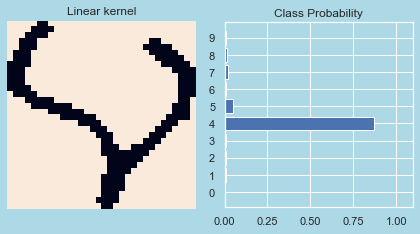

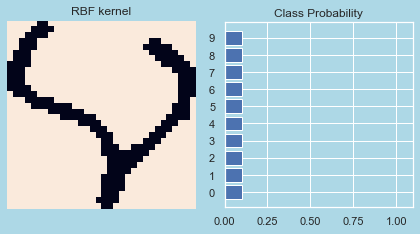

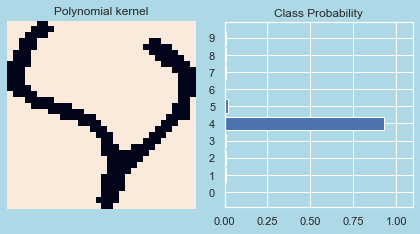

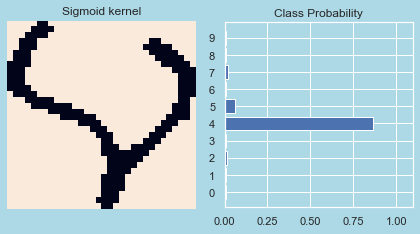

In [173]:
images, labels = next(iter(valloader))
img = images[0].view(1, 1024)
for i, clf in enumerate((linear, rbf, poly, sig)):
    print("Model =", titles[i])
    with torch.no_grad():
        probab = clf.predict_proba(img)

    print("Predicted Digit =", np.argmax(probab))
    view_classify(img.view(1, 32, 32), torch.tensor(probab), titles[i])
    print("  -  -  -  -  -")

In [174]:
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'axes.facecolor': 'lightblue', 'figure.facecolor': 'lightblue'})


def confusionMatrixAndAccuracyReport(Y_test, Y_pred,label):
    cm = metrics.confusion_matrix(Y_test, Y_pred)
    overallAccuracy = np.trace(cm)/sum(cm.flatten())

    classwiseAccuracy = np.zeros(len(cm))
    for n in range(len(cm)):
        for i in range(len(cm)):
            for j in range(len(cm)):
                if (i != n and j != n) or (i == n and j == n):
                    classwiseAccuracy[n] += cm[i][j]

    classwiseAccuracy /= sum(cm.flatten())

    plt.figure(figsize=(6, 6))
    plt.title(label+' Accuracy : {0:3.3f}'.format(overallAccuracy), size=12)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    sns.heatmap(data=cm, annot=True, square=True,  cmap='Blues')

    plt.show()
    print('Overall Accuracy Score: {0:3.3f}'.format(overallAccuracy))
    print('Classwise Accuracy Score: {0}'.format(classwiseAccuracy))


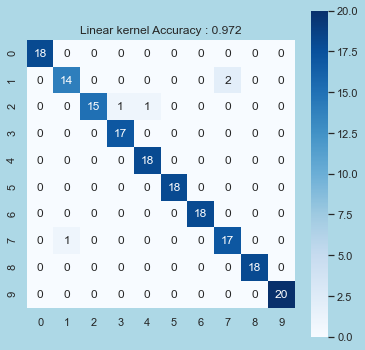

Overall Accuracy Score: 0.972
Classwise Accuracy Score: [1.         0.98314607 0.98876404 0.99438202 0.99438202 1.
 1.         0.98314607 1.         1.        ]
_____________________________________________________


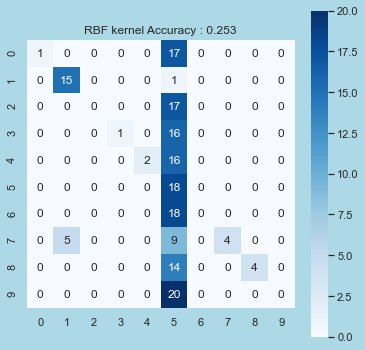

Overall Accuracy Score: 0.253
Classwise Accuracy Score: [0.90449438 0.96629213 0.90449438 0.91011236 0.91011236 0.28089888
 0.8988764  0.92134831 0.92134831 0.88764045]
_____________________________________________________


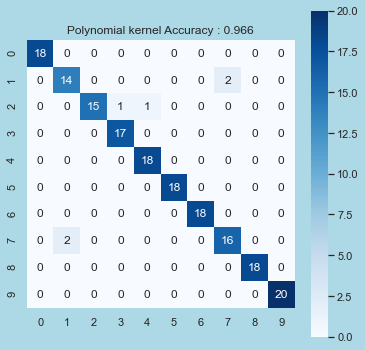

Overall Accuracy Score: 0.966
Classwise Accuracy Score: [1.         0.97752809 0.98876404 0.99438202 0.99438202 1.
 1.         0.97752809 1.         1.        ]
_____________________________________________________


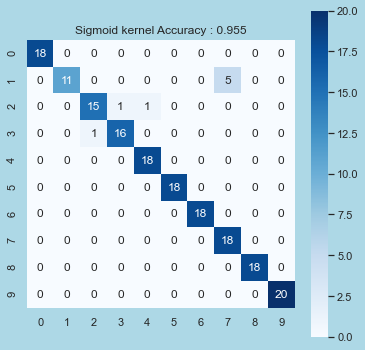

Overall Accuracy Score: 0.955
Classwise Accuracy Score: [1.         0.97191011 0.98314607 0.98876404 0.99438202 1.
 1.         0.97191011 1.         1.        ]
_____________________________________________________


In [175]:
for i, clf in enumerate((linear, rbf, poly, sig)):
    confusionMatrixAndAccuracyReport(y_test,clf.predict(X_test),titles[i])
    print('_____________________________________________________')